In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics

In [2]:
combine = pd.read_csv('C:/Users/blain/Desktop/DSC680/NFL.csv')
pd.set_option('display.max_columns', None)

In [3]:
combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No


In [4]:
combine[['Team', 'Round', 'Pick', 'Year_drafted']] = combine['Drafted..tm.rnd.yr.'].str.split('/', expand=True)
combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Year_drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes,Arizona Cardinals,1st,31st pick,2009
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes,Arizona Cardinals,6th,204th pick,2009
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes,Arizona Cardinals,5th,167th pick,2009
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes,Arizona Cardinals,3rd,95th pick,2009
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes,Arizona Cardinals,2nd,63rd pick,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No,NaN,NaN,NaN,NaN


In [5]:
combine['Round'] = combine['Round'].str.extract('(\d+)')
combine['Pick'] = combine['Pick'].str.extract('(\d+)')
combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Year_drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes,Arizona Cardinals,1,31,2009
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes,Arizona Cardinals,6,204,2009
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes,Arizona Cardinals,5,167,2009
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes,Arizona Cardinals,3,95,2009
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes,Arizona Cardinals,2,63,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No,NaN,NaN,NaN,NaN
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No,NaN,NaN,NaN,NaN


In [6]:
combine = combine.drop(['Year', 'Player', 'School', 'Drafted..tm.rnd.yr.', 'Player_Type', 'Team', 'Year_drafted'], axis=1)
combine

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Position_Type,Position,Drafted,Round,Pick
0,20.0,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,31.004194,backs_receivers,RB,Yes,1,31
1,22.0,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,33.510073,defensive_lineman,DE,Yes,6,204
2,24.0,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,41.005821,offensive_lineman,OG,Yes,5,167
3,23.0,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,28.312463,defensive_back,FS,Yes,3,95
4,22.0,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,31.327425,line_backer,OLB,Yes,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,NaN,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,26.080939,defensive_back,CB,No,NaN,NaN
3473,NaN,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,27.260221,defensive_back,CB,No,NaN,NaN
3474,NaN,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,27.336171,defensive_back,CB,No,NaN,NaN
3475,NaN,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,29.386861,defensive_back,S,No,NaN,NaN


In [7]:
combine['Position'].value_counts()

WR     506
CB     393
RB     320
OT     278
DT     255
DE     246
OLB    232
QB     194
TE     191
OG     188
ILB    148
SS     108
FS      98
C       89
P       63
S       56
FB      49
K       48
LS      13
DB       2
Name: Position, dtype: int64

In [8]:
combine['Position_Type'].value_counts()

backs_receivers       1260
defensive_back         657
offensive_lineman      555
defensive_lineman      501
line_backer            380
kicking_specialist     111
other_special           13
Name: Position_Type, dtype: int64

The specialist players (kicker, punter, and long snapper) are not drafted on the abilities measured in the combine, and rarely participate in enough drills for us to create a model, so they will not be included in the analysis.

In [9]:
combine[combine['Position'] == 'QB'].isna().sum()

Age                  36
Height                0
Weight                0
Sprint_40yd           9
Vertical_Jump        24
Bench_Press_Reps    183
Broad_Jump           23
Agility_3cone        37
Shuttle              34
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round                77
Pick                 77
dtype: int64

183/194 QBs don't do the bench press, so it will be dropped when evaluating QBs.

In [10]:
combine[combine['Position'] == 'RB'].isna().sum()

Age                  50
Height                0
Weight                0
Sprint_40yd          14
Vertical_Jump        42
Bench_Press_Reps     50
Broad_Jump           52
Agility_3cone       128
Shuttle             122
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               126
Pick                126
dtype: int64

128/320 and 122/320 RBs don't do the 3 cone and the shuttle. Consider dropping both.

In [11]:
combine[combine['Position'] == 'FB'].isna().sum()

Age                  7
Height               0
Weight               0
Sprint_40yd          1
Vertical_Jump        9
Bench_Press_Reps     7
Broad_Jump           9
Agility_3cone       16
Shuttle             15
BMI                  0
Position_Type        0
Position             0
Drafted              0
Round               24
Pick                24
dtype: int64

16/49 and 15/49 FBs don't do 3 cone and shuttle. Likely worth dropping both when combining with RBs

In [12]:
combine[combine['Position'] == 'WR'].isna().sum()

Age                  83
Height                0
Weight                0
Sprint_40yd          26
Vertical_Jump        74
Bench_Press_Reps    116
Broad_Jump           83
Agility_3cone       173
Shuttle             152
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               207
Pick                207
dtype: int64

506

In [13]:
combine[combine['Position'] == 'TE'].isna().sum()

Age                 23
Height               0
Weight               0
Sprint_40yd         12
Vertical_Jump       47
Bench_Press_Reps    40
Broad_Jump          53
Agility_3cone       67
Shuttle             66
BMI                  0
Position_Type        0
Position             0
Drafted              0
Round               56
Pick                56
dtype: int64

191

In [14]:
combine[combine['Position_Type'] == 'offensive_lineman'].isna().sum()

Age                  82
Height                0
Weight                0
Sprint_40yd          26
Vertical_Jump       112
Bench_Press_Reps     99
Broad_Jump          122
Agility_3cone       145
Shuttle             130
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               189
Pick                189
dtype: int64

555

In [15]:
combine[combine['Position_Type'] == 'defensive_back'].isna().sum()

Age                 113
Height                0
Weight                0
Sprint_40yd          35
Vertical_Jump       115
Bench_Press_Reps    126
Broad_Jump          112
Agility_3cone       250
Shuttle             234
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               212
Pick                212
dtype: int64

657

In [16]:
combine[combine['Position_Type'] == 'line_backer'].isna().sum()

Age                  38
Height                0
Weight                0
Sprint_40yd          13
Vertical_Jump        74
Bench_Press_Reps     75
Broad_Jump           62
Agility_3cone       141
Shuttle             132
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               107
Pick                107
dtype: int64

380

In [17]:
combine[combine['Position_Type'] == 'defensive_lineman'].isna().sum()

Age                  63
Height                0
Weight                0
Sprint_40yd          16
Vertical_Jump        93
Bench_Press_Reps    105
Broad_Jump          105
Agility_3cone       140
Shuttle             135
BMI                   0
Position_Type         0
Position              0
Drafted               0
Round               137
Pick                137
dtype: int64

501

In [18]:
combine.dropna()['Position_Type'].value_counts()

backs_receivers      352
offensive_lineman    235
defensive_back       231
defensive_lineman    213
line_backer          148
Name: Position_Type, dtype: int64

In [19]:
combine.dropna()['Position'].value_counts()

WR     154
CB     151
OT     120
DE     107
DT     106
OLB    103
RB     101
TE      78
OG      77
ILB     45
FS      39
C       38
SS      34
FB      18
S        7
QB       1
Name: Position, dtype: int64

In [20]:
combine_qb = combine[combine['Position'] == 'QB'].drop(['Bench_Press_Reps'], axis=1).dropna()
combine_rb_fb = combine[combine['Position'].isin(['RB', 'FB'])].drop(['Agility_3cone', 'Shuttle'], axis=1).dropna()
combine_wr_te = combine[combine['Position'].isin(['WR', 'TE'])].dropna()
combine_ol = combine[combine['Position_Type'] == 'offensive_lineman'].dropna()
combine_db = combine[combine['Position_Type'] == 'defensive_back'].dropna()
combine_lb = combine[combine['Position_Type'] == 'line_backer'].dropna()
combine_dl = combine[combine['Position_Type'] == 'defensive_lineman'].dropna()

In [21]:
qb_x = combine_qb[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
qb_y = combine_qb[['Round', 'Pick']]
rb_fb_x = combine_rb_fb[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI']]
rb_fb_y = combine_rb_fb[['Round', 'Pick']]
wr_te_x = combine_wr_te[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
wr_te_y = combine_wr_te[['Round', 'Pick']]
ol_x = combine_ol[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
ol_y = combine_ol[['Round', 'Pick']]
db_x = combine_db[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
db_y = combine_db[['Round', 'Pick']]
lb_x = combine_lb[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
lb_y = combine_lb[['Round', 'Pick']]
dl_x = combine_dl[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']]
dl_y = combine_dl[['Round', 'Pick']]

In [22]:
qb_x_train, qb_x_test, qb_y_train, qb_y_test = train_test_split(qb_x, qb_y, test_size=0.33)
rb_fb_x_train, rb_fb_x_test, rb_fb_y_train, rb_fb_y_test = train_test_split(rb_fb_x, rb_fb_y, test_size=0.33)
wr_te_x_train, wr_te_x_test, wr_te_y_train, wr_te_y_test = train_test_split(wr_te_x, wr_te_y, test_size=0.33)
ol_x_train, ol_x_test, ol_y_train, ol_y_test = train_test_split(ol_x, ol_y, test_size=0.33)
db_x_train, db_x_test, db_y_train, db_y_test = train_test_split(db_x, db_y, test_size=0.33)
lb_x_train, lb_x_test, lb_y_train, lb_y_test = train_test_split(lb_x, lb_y, test_size=0.33)
dl_x_train, dl_x_test, dl_y_train, dl_y_test = train_test_split(dl_x, dl_y, test_size=0.33)

QBs

In [23]:
QB_Scaler = StandardScaler()
qb_x_train = QB_Scaler.fit_transform(qb_x_train)
qb_x_test = QB_Scaler.transform(qb_x_test)

In [24]:
QB_Pick_Model = LinearRegression()
QB_Pick_Model.fit(qb_x_train, qb_y_train['Pick'])

LinearRegression()

In [25]:
metrics.mean_squared_error(qb_y_test['Pick'], QB_Pick_Model.predict(qb_x_test))

6168.595080177197

In [26]:
metrics.r2_score(qb_y_test['Pick'], QB_Pick_Model.predict(qb_x_test))

0.06584335880298053

In [27]:
QB_Round_Model = LogisticRegression()
QB_Round_Model.fit(qb_x_train, qb_y_train['Round'])

LogisticRegression()

In [28]:
metrics.accuracy_score(qb_y_test['Round'], QB_Round_Model.predict(qb_x_test))

0.20689655172413793

In [29]:
metrics.confusion_matrix(qb_y_test['Round'], QB_Round_Model.predict(qb_x_test))

array([[6, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 2, 0],
       [2, 0, 1, 2, 0, 0, 0],
       [0, 1, 3, 2, 0, 0, 0],
       [0, 1, 2, 1, 1, 0, 0]], dtype=int64)

RBs + FBs

In [30]:
RB_FB_Scaler = StandardScaler()
rb_fb_x_train = RB_FB_Scaler.fit_transform(rb_fb_x_train)
rb_fb_x_test = RB_FB_Scaler.transform(rb_fb_x_test)

In [31]:
RB_FB_Pick_Model = LinearRegression()
RB_FB_Pick_Model.fit(rb_fb_x_train, rb_fb_y_train['Pick'])

LinearRegression()

In [32]:
metrics.mean_squared_error(rb_fb_y_test['Pick'], RB_FB_Pick_Model.predict(rb_fb_x_test))

4424.533721388701

In [33]:
metrics.r2_score(rb_fb_y_test['Pick'], RB_FB_Pick_Model.predict(rb_fb_x_test))

-0.1348519725481725

In [34]:
RB_FB_Round_Model = LogisticRegression()
RB_FB_Round_Model.fit(rb_fb_x_train, rb_fb_y_train['Round'])

LogisticRegression()

In [35]:
metrics.accuracy_score(rb_fb_y_test['Round'], RB_FB_Round_Model.predict(rb_fb_x_test))

0.1320754716981132

In [36]:
metrics.confusion_matrix(rb_fb_y_test['Round'], RB_FB_Round_Model.predict(rb_fb_x_test))

array([[0, 2, 3, 2, 1, 0, 1],
       [0, 2, 1, 1, 1, 0, 2],
       [0, 1, 2, 1, 0, 0, 2],
       [0, 1, 2, 1, 5, 3, 1],
       [0, 1, 1, 2, 2, 1, 1],
       [0, 0, 1, 1, 4, 0, 2],
       [0, 0, 0, 0, 2, 0, 0]], dtype=int64)

WRs + TEs

In [37]:
WR_TE_Scaler = StandardScaler()
wr_te_x_train = WR_TE_Scaler.fit_transform(wr_te_x_train)
wr_te_x_test = WR_TE_Scaler.transform(wr_te_x_test)

In [38]:
WR_TE_Pick_Model = LinearRegression()
WR_TE_Pick_Model.fit(wr_te_x_train, wr_te_y_train['Pick'])

LinearRegression()

In [39]:
metrics.mean_squared_error(wr_te_y_test['Pick'], WR_TE_Pick_Model.predict(wr_te_x_test))

5204.571124539734

In [40]:
metrics.r2_score(wr_te_y_test['Pick'], WR_TE_Pick_Model.predict(wr_te_x_test))

-0.09587055281571177

In [41]:
WR_TE_Round_Model = LogisticRegression()
WR_TE_Round_Model.fit(wr_te_x_train, wr_te_y_train['Round'])

LogisticRegression()

In [42]:
metrics.accuracy_score(wr_te_y_test['Round'], WR_TE_Round_Model.predict(wr_te_x_test))

0.2077922077922078

In [43]:
metrics.confusion_matrix(wr_te_y_test['Round'], WR_TE_Round_Model.predict(wr_te_x_test))

array([[1, 3, 1, 1, 0, 1, 0],
       [1, 3, 1, 1, 0, 1, 0],
       [1, 3, 2, 8, 0, 2, 1],
       [1, 1, 1, 7, 1, 1, 2],
       [0, 2, 1, 4, 3, 1, 0],
       [2, 1, 1, 3, 2, 0, 0],
       [2, 2, 4, 2, 1, 1, 0]], dtype=int64)

OL

In [44]:
OL_Scaler = StandardScaler()
ol_x_train = OL_Scaler.fit_transform(ol_x_train)
ol_x_test = OL_Scaler.transform(ol_x_test)

In [45]:
OL_Pick_Model = LinearRegression()
OL_Pick_Model.fit(ol_x_train, ol_y_train['Pick'])

LinearRegression()

In [46]:
metrics.mean_squared_error(ol_y_test['Pick'], OL_Pick_Model.predict(ol_x_test))

5452.241498515569

In [47]:
metrics.r2_score(ol_y_test['Pick'], OL_Pick_Model.predict(ol_x_test))

-0.06282614010218568

In [48]:
OL_Round_Model = LogisticRegression()
OL_Round_Model.fit(ol_x_train, ol_y_train['Round'])

LogisticRegression()

In [49]:
metrics.accuracy_score(ol_y_test['Round'], OL_Round_Model.predict(ol_x_test))

0.1794871794871795

In [50]:
metrics.confusion_matrix(ol_y_test['Round'], OL_Round_Model.predict(ol_x_test))

array([[ 4,  7,  0,  0,  2,  0,  1],
       [ 2,  3,  3,  0,  3,  1,  0],
       [ 0,  1,  1,  1,  4,  1,  0],
       [ 1,  3,  1,  0, 10,  2,  1],
       [ 1,  2,  1,  0,  2,  2,  0],
       [ 1,  2,  1,  1,  1,  2,  0],
       [ 3,  2,  0,  0,  2,  1,  2]], dtype=int64)

DBs

In [51]:
DB_Scaler = StandardScaler()
db_x_train = DB_Scaler.fit_transform(db_x_train)
db_x_test = DB_Scaler.transform(db_x_test)

In [52]:
DB_Pick_Model = LinearRegression()
DB_Pick_Model.fit(db_x_train, db_y_train['Pick'])

LinearRegression()

In [53]:
metrics.mean_squared_error(db_y_test['Pick'], DB_Pick_Model.predict(db_x_test))

3132.1612728766777

In [54]:
metrics.r2_score(db_y_test['Pick'], DB_Pick_Model.predict(db_x_test))

0.06484314700717808

In [55]:
DB_Round_Model = LogisticRegression()
DB_Round_Model.fit(db_x_train, db_y_train['Round'])

LogisticRegression()

In [56]:
metrics.accuracy_score(db_y_test['Round'], DB_Round_Model.predict(db_x_test))

0.2077922077922078

In [57]:
metrics.confusion_matrix(db_y_test['Round'], DB_Round_Model.predict(db_x_test))

array([[4, 3, 0, 1, 0, 0, 0],
       [0, 1, 3, 1, 0, 0, 1],
       [2, 6, 5, 3, 1, 1, 0],
       [0, 6, 2, 3, 3, 0, 2],
       [0, 6, 1, 2, 1, 1, 5],
       [0, 3, 1, 0, 1, 1, 1],
       [0, 2, 3, 0, 0, 0, 1]], dtype=int64)

LBs

In [58]:
LB_Scaler = StandardScaler()
lb_x_train = LB_Scaler.fit_transform(lb_x_train)
lb_x_test = LB_Scaler.transform(lb_x_test)

In [59]:
LB_Pick_Model = LinearRegression()
LB_Pick_Model.fit(lb_x_train, lb_y_train['Pick'])

LinearRegression()

In [60]:
metrics.mean_squared_error(lb_y_test['Pick'], LB_Pick_Model.predict(lb_x_test))

3431.056700570933

In [61]:
metrics.r2_score(lb_y_test['Pick'], LB_Pick_Model.predict(lb_x_test))

0.2305714175969512

In [62]:
LB_Round_Model = LogisticRegression()
LB_Round_Model.fit(lb_x_train, lb_y_train['Round'])

LogisticRegression()

In [63]:
metrics.accuracy_score(lb_y_test['Round'], LB_Round_Model.predict(lb_x_test))

0.20408163265306123

In [64]:
metrics.confusion_matrix(lb_y_test['Round'], LB_Round_Model.predict(lb_x_test))

array([[4, 2, 2, 1, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [1, 1, 1, 2, 0, 0, 0],
       [2, 0, 2, 1, 1, 1, 4],
       [0, 1, 1, 3, 0, 0, 4],
       [0, 1, 1, 1, 1, 2, 2],
       [0, 0, 1, 1, 0, 0, 2]], dtype=int64)

DL

In [65]:
DL_Scaler = StandardScaler()
dl_x_train = DL_Scaler.fit_transform(dl_x_train)
dl_x_test = DL_Scaler.transform(dl_x_test)

In [66]:
DL_Pick_Model = LinearRegression()
DL_Pick_Model.fit(dl_x_train, dl_y_train['Pick'])

LinearRegression()

In [67]:
metrics.mean_squared_error(dl_y_test['Pick'], DL_Pick_Model.predict(dl_x_test))

4131.066394693904

In [68]:
metrics.r2_score(dl_y_test['Pick'], DL_Pick_Model.predict(dl_x_test))

0.27200862822142147

In [69]:
DL_Round_Model = LogisticRegression()
DL_Round_Model.fit(dl_x_train, dl_y_train['Round'])

LogisticRegression()

In [70]:
metrics.accuracy_score(dl_y_test['Round'], DL_Round_Model.predict(dl_x_test))

0.22535211267605634

In [71]:
metrics.confusion_matrix(dl_y_test['Round'], DL_Round_Model.predict(dl_x_test))

array([[5, 2, 6, 1, 0, 0, 0],
       [2, 4, 1, 1, 0, 0, 0],
       [6, 4, 6, 3, 1, 1, 2],
       [3, 1, 1, 0, 0, 0, 0],
       [0, 1, 3, 0, 0, 0, 0],
       [0, 2, 3, 2, 0, 0, 0],
       [1, 1, 2, 0, 0, 5, 1]], dtype=int64)

<AxesSubplot:xlabel='Position'>

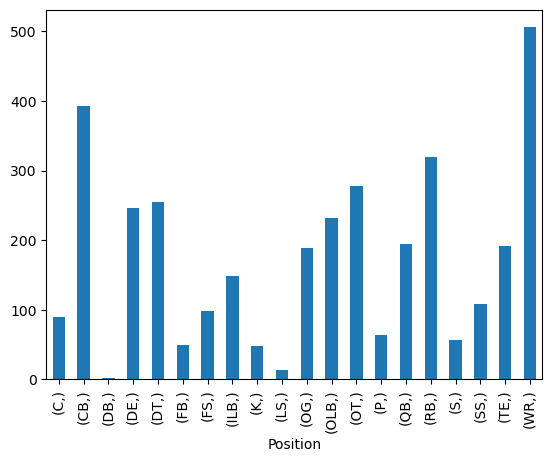

In [72]:
combine[['Position']].value_counts(sort=False).plot.bar()

<AxesSubplot:xlabel='Position_Type'>

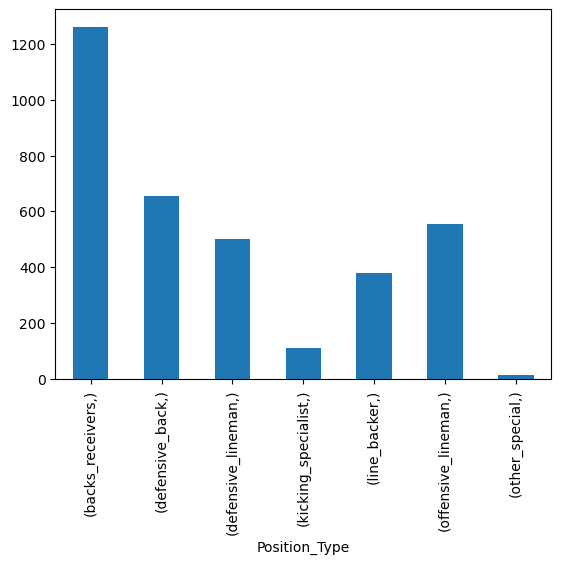

In [73]:
combine[['Position_Type']].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='Frequency'>

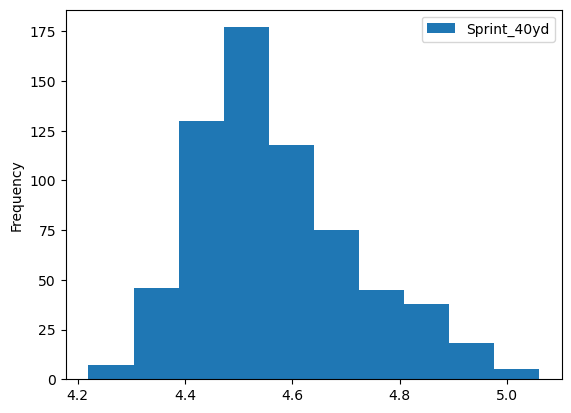

In [74]:
combine[combine['Position'].isin(['WR', 'TE'])][['Sprint_40yd']].plot.hist()